In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
from math import sqrt, sin, cos

# Question 1

In [2]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dLdz):
        dzdx = self.y
        dLdx = dLdz * dzdx
        
        dzdy = self.x
        dLdy = dLdz * dzdy
        return [dLdx, dLdy]

class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
        
    def backward(self, dLdz):
        dzdy = 1
        dzdx = 1
        return [dLdz * dzdy, dLdz * dzdx]

class Sin:
    def forward(self, x):
        self.x = x
        return np.sin(x)
    
    def backward(self, dLdz):
        dzdx = np.cos(self.x)
        return dLdz*dzdx
    
class Cos:
    def forward(self, x):
        self.x = x
        return np.cos(x)
    
    def backward(self, dLdz):
        dzdx = -np.sin(self.x)
        return dLdz*dzdx

Now we create the function that computes sin(x^2) and its gradient

In [3]:
def g_with_gradient(x):
    sin = Sin()
    mul = Multiply()
    
    mul_out = mul.forward(x,x)
    sin_out = sin.forward(mul_out)
    
    grad_sin = sin.backward(1.0)
    grad_mul = mul.backward(grad_sin)[0]+mul.backward(grad_sin)[1]
    
    return sin_out, grad_mul

In [4]:
g_with_gradient(3.14159265)

(-0.43030119663972211, -5.6717394576050566)

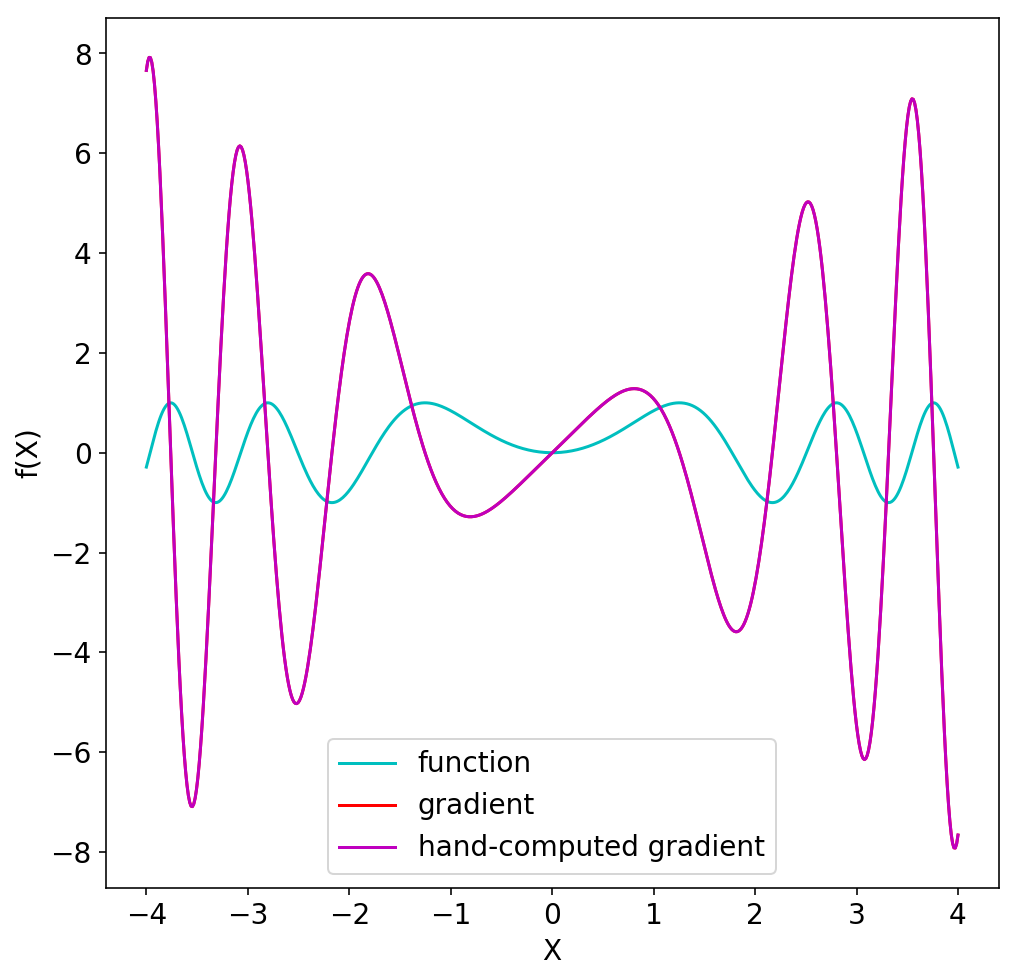

In [5]:
line = np.linspace(-4, 4, 600).reshape(-1, 1)

plt.plot(line, g_with_gradient(line)[0], '-c', label='function')
plt.plot(line, g_with_gradient(line)[1], '-r', label='gradient')
plt.plot(line, 2*(line)*np.cos((line)*(line)), '-m', label='hand-computed gradient')

plt.legend(loc='best')
plt.xlabel("X")
plt.ylabel("f(X)");

The gradient of sin(x^2) computed by hand (which is 2*x*cos(x^2)) and the one computed using the backprop framework match perfectly.

Now we create the function that computes (cos(2x))^2 and its gradient.

In [6]:
def f_with_gradient(x):
    mul = Multiply()
    cos = Cos()
    add = Add()
    
    add_out = add.forward(x,x)
    cos_out = cos.forward(add_out)
    mul_out = mul.forward(cos_out,cos_out)
    
    grad_mul = mul.backward(1.0)
    grad_cos1 = cos.backward((grad_mul)[0])
    grad_cos2 = cos.backward((grad_mul)[1])
    grad_add1 = add.backward(grad_cos1)[0]+add.backward(grad_cos1)[1]
    grad_add2 = add.backward(grad_cos2)[0]+add.backward(grad_cos2)[1]
    
    return mul_out, grad_add1 + grad_add2

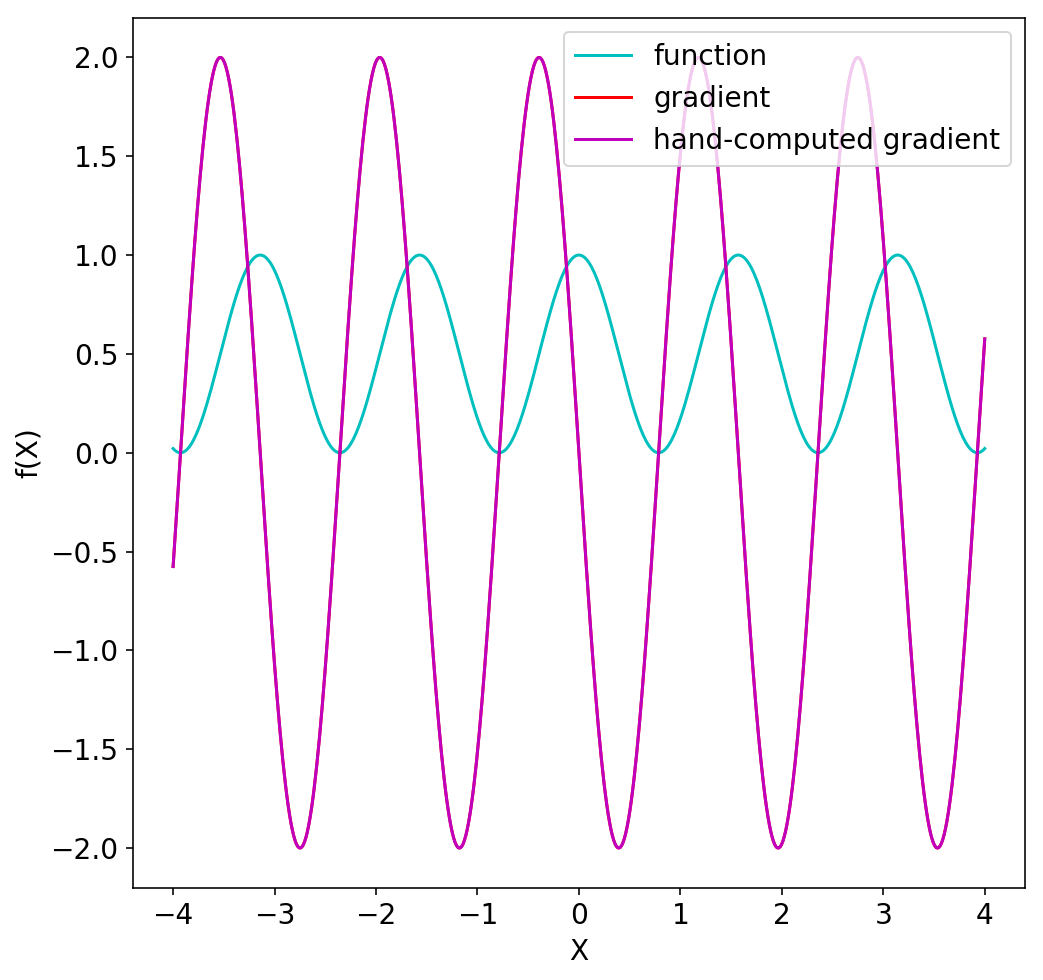

In [9]:
line = np.linspace(-4, 4, 600).reshape(-1, 1)

plt.plot(line, f_with_gradient(line)[0], '-c', label='function')
plt.plot(line, f_with_gradient(line)[1], '-r', label='gradient')
plt.plot(line, -4*np.cos(2*(line))*np.sin(2*(line)), '-m', label='hand-computed gradient')

plt.legend(loc='best')
plt.xlabel("X")
plt.ylabel("f(X)");

Once more the gradient computed by hand and the one obtained with the backprop framework match exactly.

# Question 2

In the first part, we don't use the polynomial features.

0.995


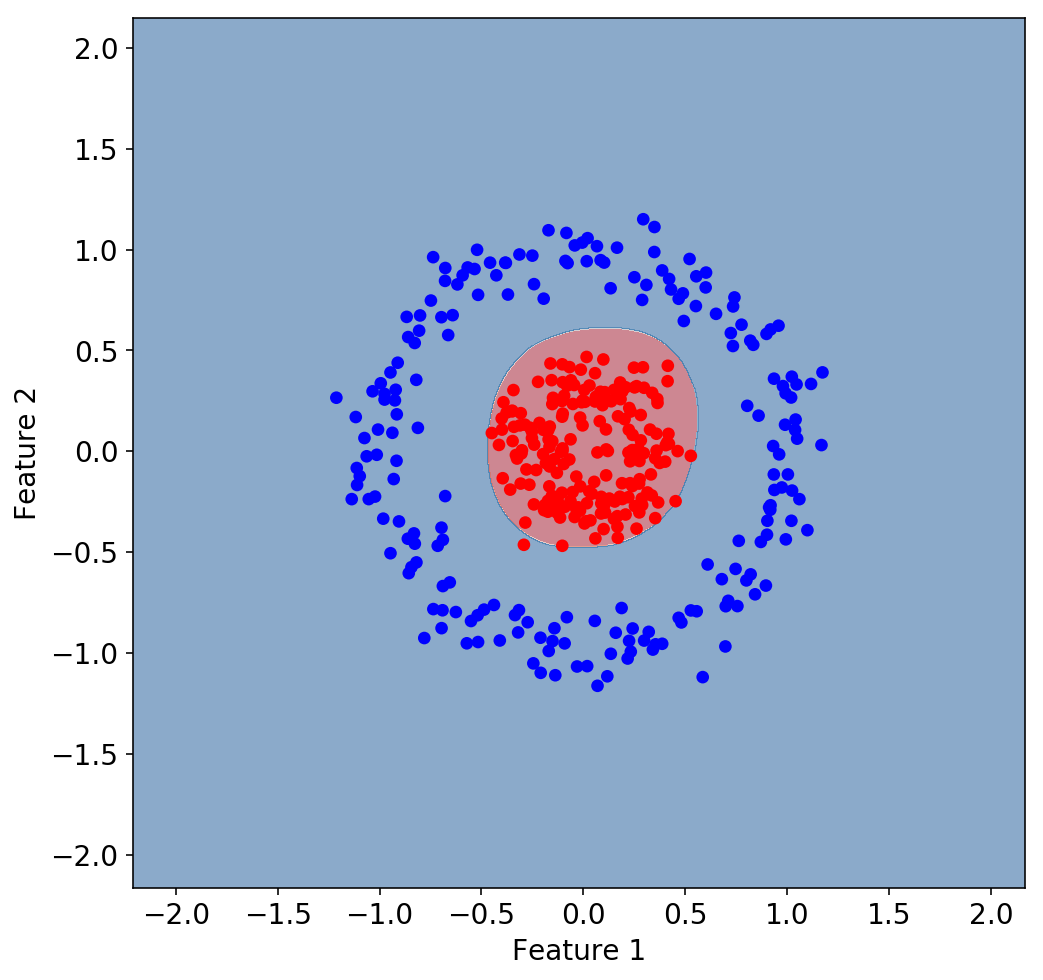

In [2]:
from sklearn.datasets import make_circles
from math import *
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = make_circles(n_samples=400, factor=.3, noise=.1)

labels = [0, 1]
y = np.take(labels, (y < 0.5))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)



clf = MLPClassifier(hidden_layer_sizes=(400), early_stopping=True,
                    validation_fraction=0.2,
                    activation='relu')

clf.fit(X, y)

# build our grid of values
h = 0.005  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print (clf.score(X_test, y_test))

Z = Z.reshape(xx.shape)
plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)

labelsS = ['b', 'r']
y = np.take(labelsS, (y < 0.5))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Without using polynomial features, the neural network needs at least 1 layer, and at least ~250 neurons in each to solve the problem (most of the time).

We know use polynomial features.

0.995


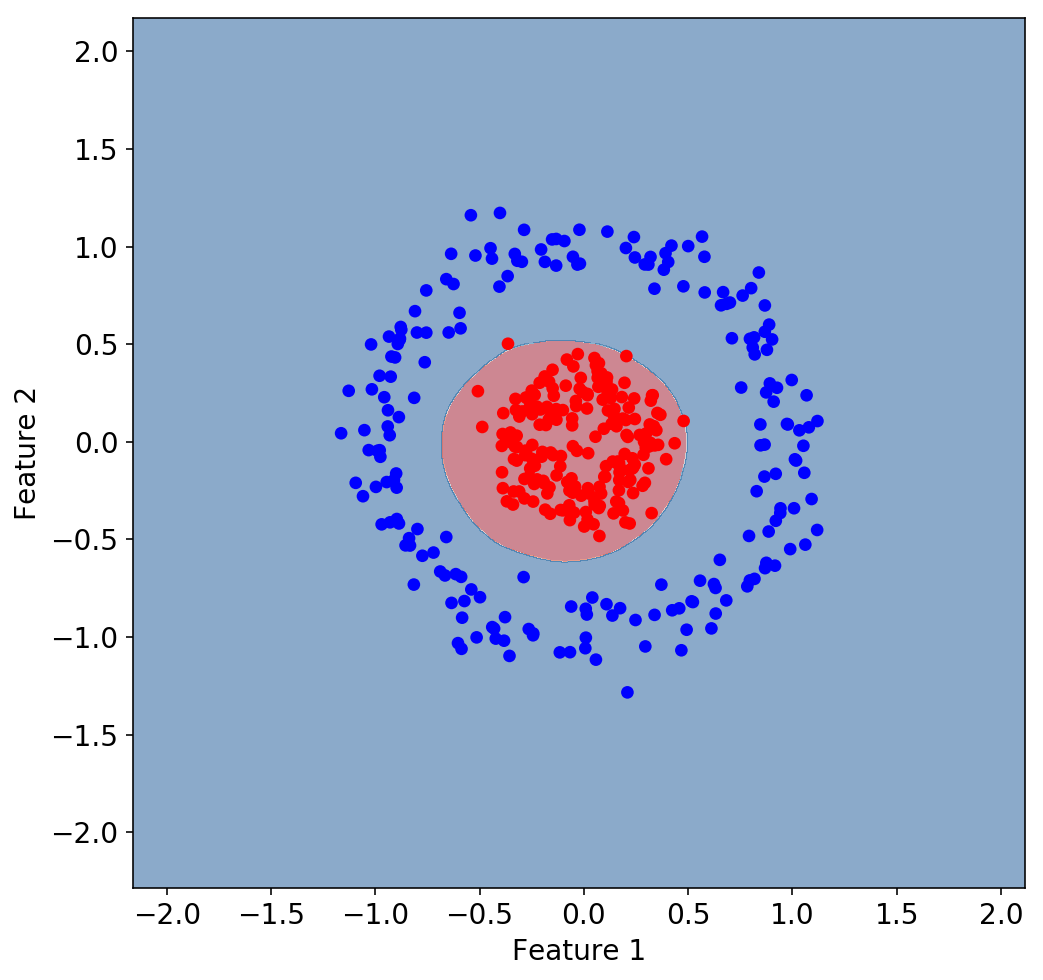

In [42]:
X, y = make_circles(n_samples=400, factor=.3, noise=.1)

labels = [0, 1]
y = np.take(labels, (y < 0.5))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

clf = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('mlp', MLPClassifier(hidden_layer_sizes=(180), early_stopping=True,
                    validation_fraction=0.2,
                    activation='relu'))])

clf.fit(X, y)

# build our grid of values
h = 0.005  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print (clf.score(X_test, y_test))

Z = Z.reshape(xx.shape)
plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)

labelsS = ['b', 'r']
y = np.take(labelsS, (y < 0.5))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

When polynomial features are used, 1 layer with ~180 neurons allows to solve the problem. Less neurons are needed than in the absence of polynomial features. To answer this question in a more rigourous way, I would repeat the training 100 times and accept the number of neurons that allows to get a score of 0.995 in all cases.

Now we change the activation function from relu to tanh.

1.0


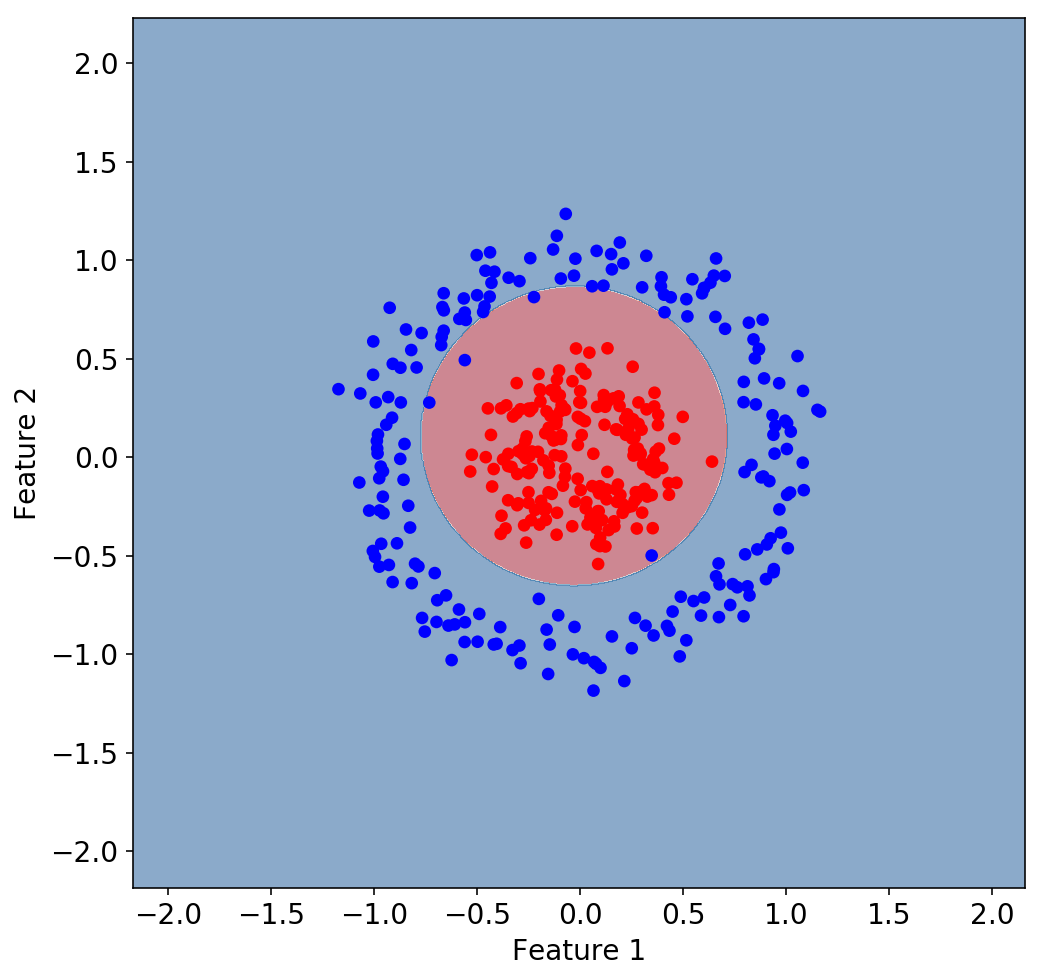

In [109]:
X, y = make_circles(n_samples=400, factor=.3, noise=.1)

labels = [0, 1]
y = np.take(labels, (y < 0.5))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

clf = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('mlp', MLPClassifier(hidden_layer_sizes=(180), early_stopping=True,
                    validation_fraction=0.2,
                    activation='tanh'))])

clf.fit(X, y)

# build our grid of values
h = 0.005  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print (clf.score(X_test, y_test))

Z = Z.reshape(xx.shape)
plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)

labelsS = ['b', 'r']
y = np.take(labelsS, (y < 0.5))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Changing the activation function from relu to tanh does not seem to make a difference for this problem.

Now we try to represent how the neural network separates the problem into a linearly separable problem. For this, we show the output of each of the neurons, which is a linear function. The combination of all these outputs can solve the circle problem.

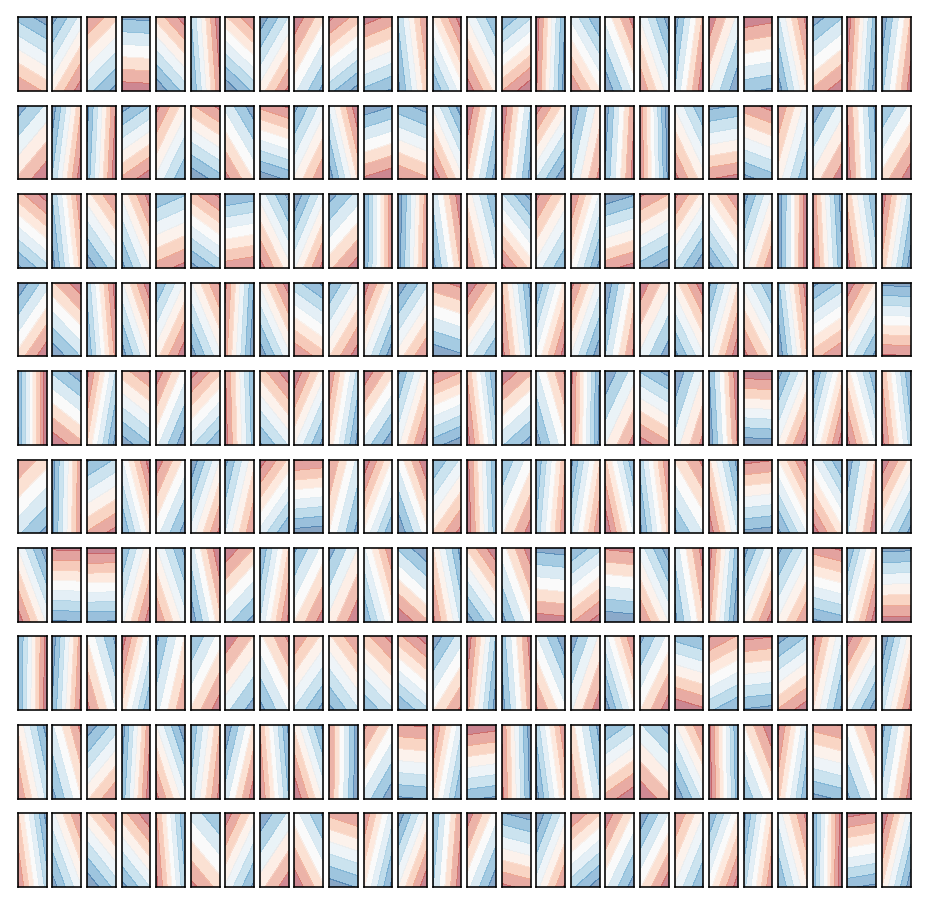

In [8]:
X, y = make_circles(n_samples=400, factor=.3, noise=.1)

labels = [0, 1]
y = np.take(labels, (y < 0.5))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(260), early_stopping=True,
                    validation_fraction=0.2,
                    activation='relu')

clf.fit(X, y)

# build our grid of values
#h = 0.005  # step size in the mesh
h = 1.  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
#print (xx, yy)
fig, axes = plt.subplots(10, 26)
# use global min / max to ensure all weights are shown on the same scale
#vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, intercept, ax in zip(clf.coefs_[0].T, clf.intercepts_[0], axes.ravel()):
    Z = coef[0]*xx.ravel()+coef[1]*yy.ravel()+intercept
    Z = Z.reshape(xx.shape)    
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# Question 2.5

0.953333333333


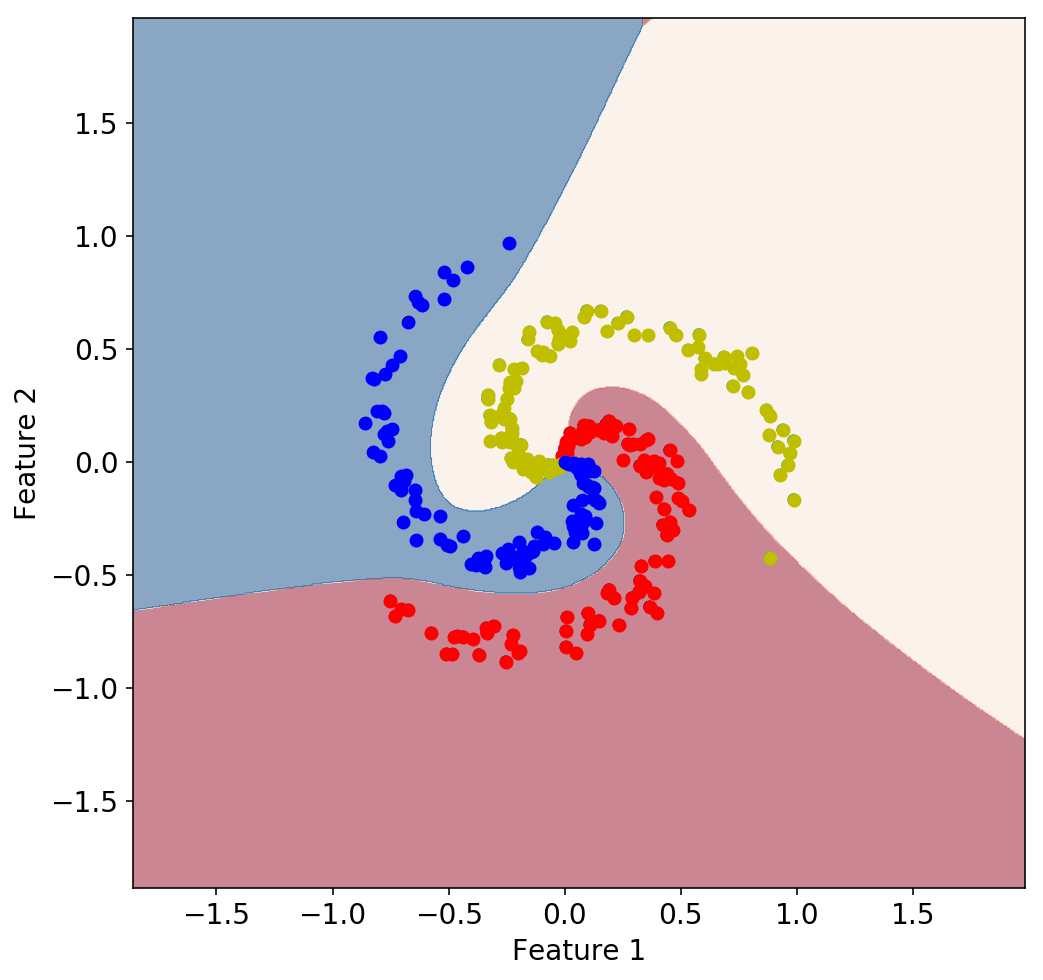

In [3]:
def make_spiral():
    N = 100 # number of points per class
    K = 3 # number of classes
    X = np.zeros((N*K, 2)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N) # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y


X, y = make_spiral()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

clf = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('mlp', MLPClassifier(hidden_layer_sizes=(1200, 1200, 1200),
                        early_stopping=True,
                        validation_fraction=0.2,
                        activation='relu'))])

clf.fit(X, y)

# build our grid of values
h = 0.005  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print (clf.score(X_test, y_test))

Z = Z.reshape(xx.shape)
plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)

colors = "ryb"
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


Three layers are needed to solve the problem and around 1200 neurons per layer are needed.

We then try the validation function tanh instead of relu.

0.893333333333


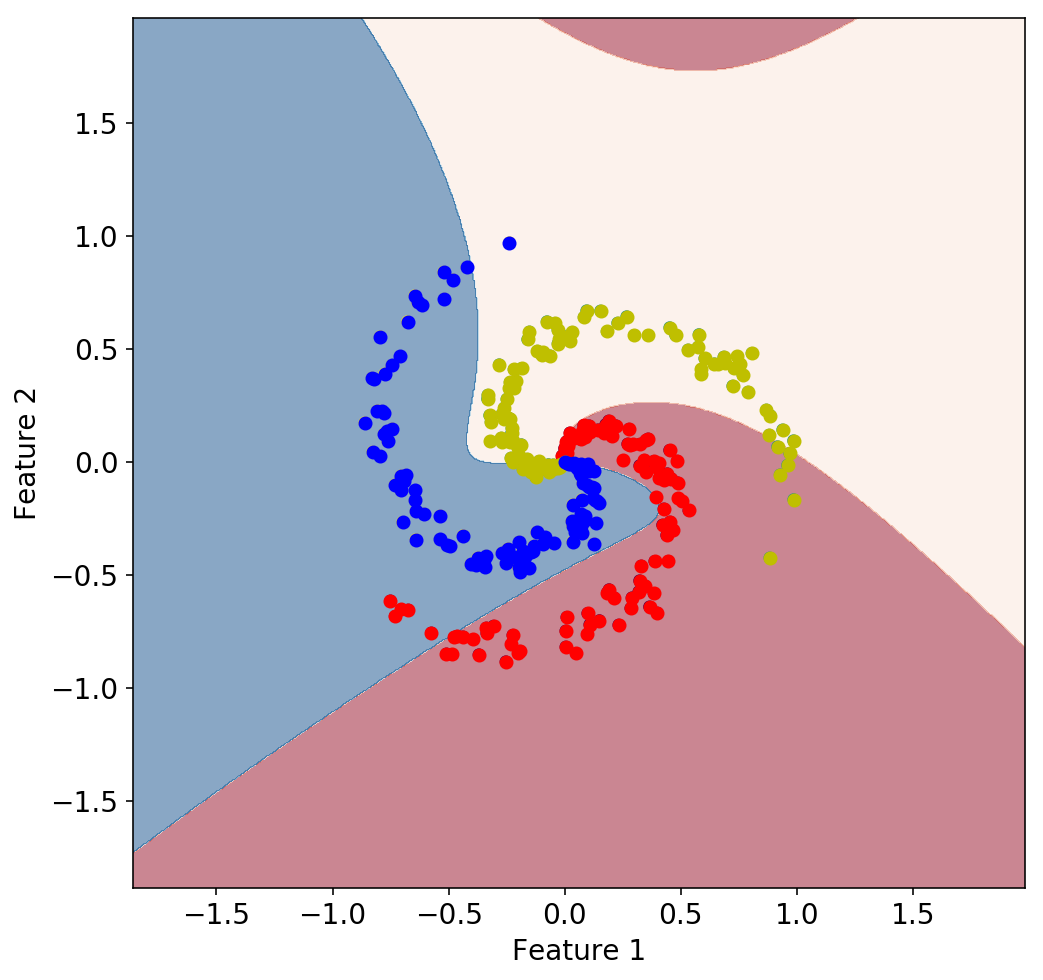

In [6]:
clf = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('mlp', MLPClassifier(hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800),
                        early_stopping=True,
                        validation_fraction=0.2,
                        activation='tanh'))])

clf.fit(X, y)

# build our grid of values
h = 0.005  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print (clf.score(X_test, y_test))

Z = Z.reshape(xx.shape)
plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)

colors = "ryb"
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

When using tanh as a validation function, the classification requires more layers and neurons, which results in very long training time. In the example shown above, 8 layers of 800 neurons are used and this does not even seem enough.

# Question 3

We first show an example using fully connected layer, then a convolution layer, and finally an AlexNet reaching an accuracy of 0.96. One could easily do better by increasing the number of units in the dense layers.

In [97]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)

In [112]:
# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

fc = Sequential()
fc.add(Dense(88, input_shape=(28,28,1,)))
fc.add(Activation('tanh'))
fc.add(Flatten())
fc.add(Dense(10))

fc.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

fc.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = fc.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
60000/60000 [==============================] - 30s - loss: 0.4615 - acc: 0.6042          

In [109]:
# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

model = Sequential()
 
model.add(Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
60000/60000 [==============================] - 12s - loss: 9.9152 - acc: 0.3829       

In [94]:
# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

model = Sequential()
 
model.add(Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(28, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(88, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
60000/60000 [==============================] - 54s - loss: 1.6674 - acc: 0.7897        